In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("breast-cancer.data")
df.head()


,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
df.shape

(285, 10)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49,40-49
premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno,premeno
30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24,0-4
0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
no,no,no,no,no,no,no,no,no,no,no
3,2,2,2,2,2,2,1,2,2,3
left,right,left,right,right,left,left,left,left,right,left
left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up,central
no.1,no,no,no,no,no,no,no,no,no,no


In [4]:
col_names = ['Class', 'age', 'menopause', 'tumor_size', 'inv_nodes',
             'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']
if df.shape[1] == len(col_names):
    df.columns = col_names
else:
    df.columns = [f'col_{i}' for i in range(df.shape[1])]

print("\nColumns:", df.columns.tolist())



Columns: ['Class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']


In [5]:
df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
df.dtypes

,0
Class,object
age,object
menopause,object
tumor_size,object
inv_nodes,object
node_caps,object
deg_malig,int64
breast,object
breast_quad,object
irradiat,object


In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Class,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
age,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49,40-49
menopause,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno,premeno
tumor_size,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24,0-4
inv_nodes,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
node_caps,no,no,no,no,no,no,no,no,no,no
deg_malig,2,2,2,2,2,2,1,2,2,3
breast,right,left,right,right,left,left,left,left,right,left
breast_quad,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up,central
irradiat,no,no,no,no,no,no,no,no,no,no


In [6]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'Class' (2 unique values):
['no-recurrence-events' 'recurrence-events']
--------------------------------------------------
Column 'age' (6 unique values):
['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
--------------------------------------------------
Column 'menopause' (3 unique values):
['premeno' 'ge40' 'lt40']
--------------------------------------------------
Column 'tumor_size' (11 unique values):
['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
--------------------------------------------------
Column 'inv_nodes' (7 unique values):
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
--------------------------------------------------
Column 'node_caps' (3 unique values):
['no' 'yes' '?']
--------------------------------------------------
Column 'breast' (2 unique values):
['right' 'left']
--------------------------------------------------
Column 'breast_quad' (6 unique values):
['right_up' 'left_low' 'left_up' 'right_low' 'central' 

In [7]:
for col in df.columns:
    q_count = df[col][df[col] == '?'].count()
    nan_count = df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

Column 'node_caps': '?' = 8, NaN = 0, Total missing = 8
Column 'breast_quad': '?' = 1, NaN = 0, Total missing = 1


In [8]:
import numpy as np
df_missing = df.replace("?",np.nan)

In [9]:
missing_proportions = df_missing.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Column 'node_caps': 2.81% missing (including '?')
Column 'breast_quad': 0.35% missing (including '?')


In [10]:
df.replace('?', np.nan, inplace=True)
df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [11]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

Class 0
age 0
menopause 0
tumor_size 0
inv_nodes 0
node_caps 0
breast 0
breast_quad 0
irradiat 0


In [12]:
numeric = df.select_dtypes(include=[np.number])
if not numeric.empty:
    print("Numeric Summary:\n", numeric.describe())




Numeric Summary:
         deg_malig
count  285.000000
mean     2.045614
std      0.737351
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000


In [13]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- Class ---
Class
no-recurrence-events    200
recurrence-events        85
Name: count, dtype: int64

--- age ---
age
50-59    96
40-49    90
60-69    57
30-39    35
70-79     6
20-29     1
Name: count, dtype: int64

--- menopause ---
menopause
premeno    149
ge40       129
lt40         7
Name: count, dtype: int64

--- tumor_size ---
tumor_size
30-34    59
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64

--- inv_nodes ---
inv_nodes
0-2      212
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: count, dtype: int64

--- node_caps ---
node_caps
no     221
yes     56
NaN      8
Name: count, dtype: int64

--- deg_malig ---
deg_malig
2    130
3     84
1     71
Name: count, dtype: int64

--- breast ---
breast
left     151
right    134
Name: count, dtype: int64

--- breast_quad ---
breast_quad
left_low     109
left_up       97
right_up      33
right_low     24
c

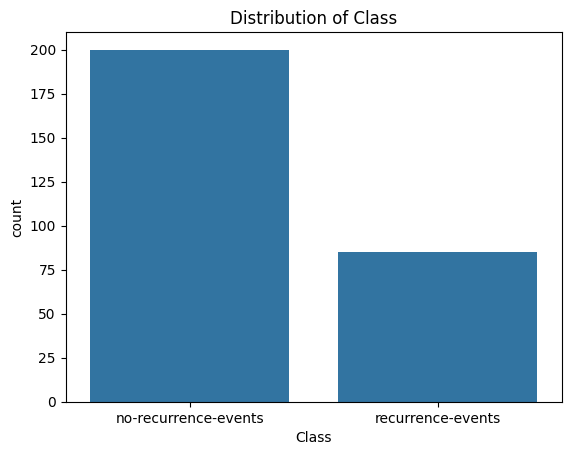

In [14]:
sns.countplot(x = "Class", data = df)
plt.title("Distribution of Class")
plt.show()


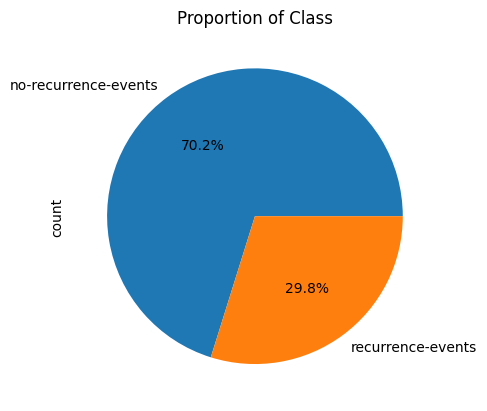

In [15]:
df.Class.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Class")
plt.show()

These two diagrams show us that our target variable is imbalanced .

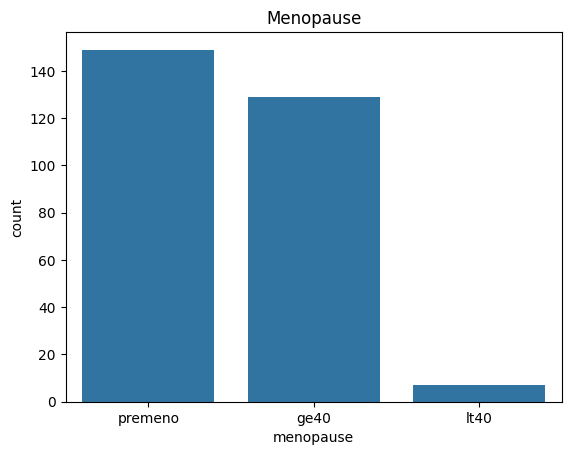

Proportion of Menopause
menopause
premeno    52.280702
ge40       45.263158
lt40        2.456140
Name: proportion, dtype: float64


In [16]:
sns.countplot(x = "menopause", data = df)
plt.title("Menopause")
plt.show()
print("Proportion of Menopause")
print(df.menopause.value_counts(normalize = True)*100)


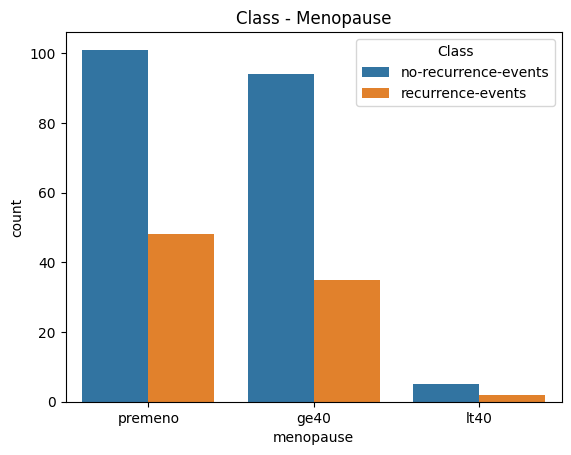

In [17]:
sns.countplot(x="menopause", hue= "Class", data = df)
plt.title("Class - Menopause")
plt.show()

Higher proportion of recurrence events appear among the premenopausal groups compared to others.

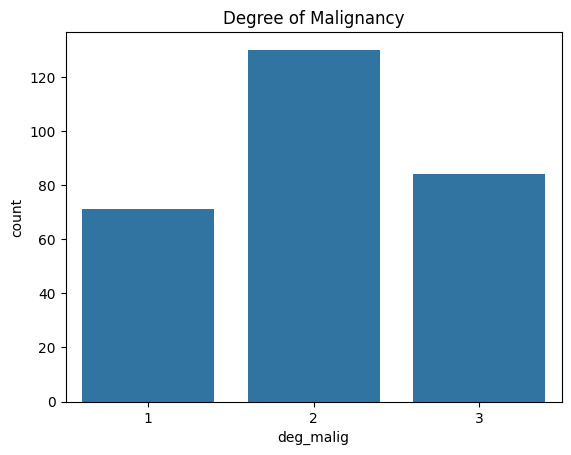

Proportion of Deg_malig
deg_malig
2    45.614035
3    29.473684
1    24.912281
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x = "deg_malig", data = df)
plt.title("Degree of Malignancy")
plt.show()
print("Proportion of Deg_malig")
print(df.deg_malig.value_counts(normalize = True)*100)


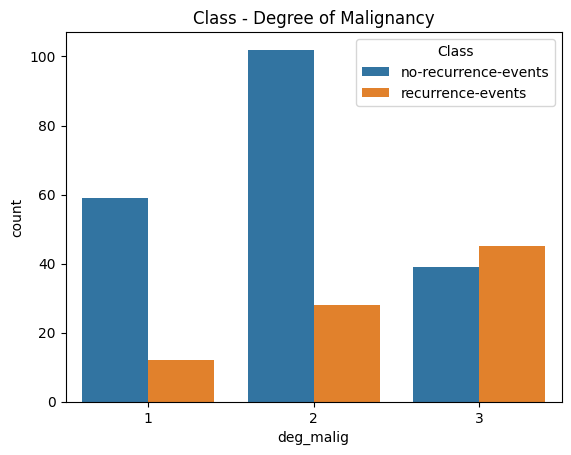

In [ ]:
sns.countplot(x="deg_malig", hue= "Class", data = df)
plt.title("Class - Degree of Malignancy")
plt.show()


As the degree of malignancy increases,the number of recurrence events also tends to increase.

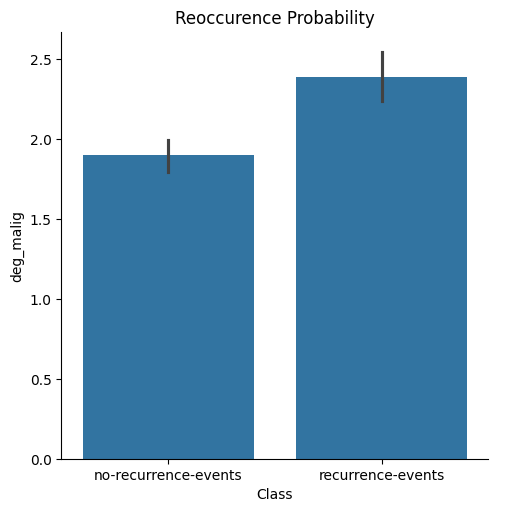

In [ ]:
sns.catplot(x = "Class", y = "deg_malig",
            data = df, kind = "bar", height= 5)
plt.title("Reoccurence Probability")
plt.show()

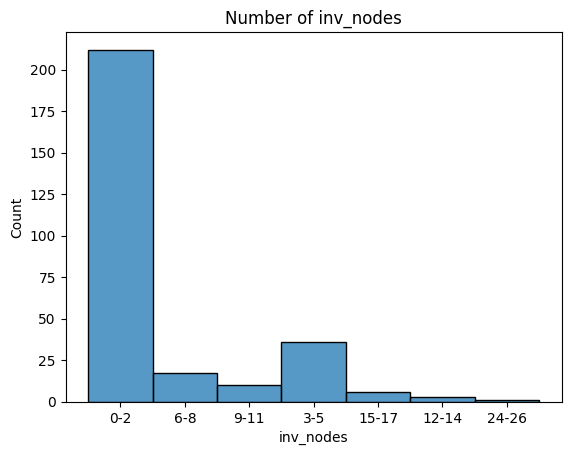

Proportion of inv_nodes
inv_nodes
0-2      74.385965
3-5      12.631579
6-8       5.964912
9-11      3.508772
15-17     2.105263
12-14     1.052632
24-26     0.350877
Name: proportion, dtype: float64


In [ ]:
sns.histplot(x = "inv_nodes", data = df)
plt.title("Number of inv_nodes")
plt.show()
print("Proportion of inv_nodes")
print(df.inv_nodes.value_counts(normalize = True)*100)


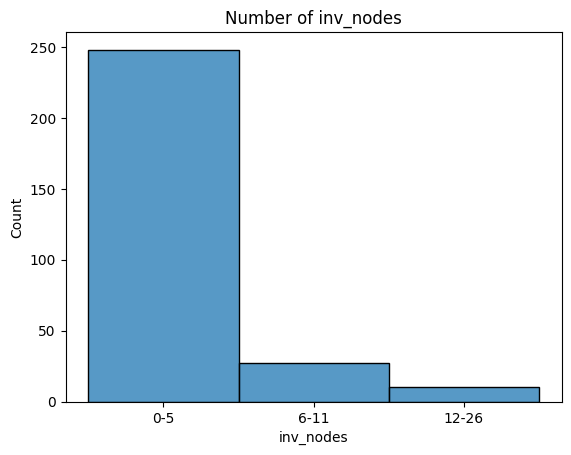

In [ ]:
df['inv_nodes'] = df['inv_nodes'].replace({"0-2": "0-5", "3-5": "0-5"})
df['inv_nodes'] = df['inv_nodes'].replace({"6-8": "6-11", "9-11": "6-11"})
df['inv_nodes'] = df['inv_nodes'].replace({"15-17": "12-26", "12-14": "12-26","24-26":"12-26"})

sns.histplot(x = "inv_nodes", data = df)
plt.title("Number of inv_nodes")
plt.show()


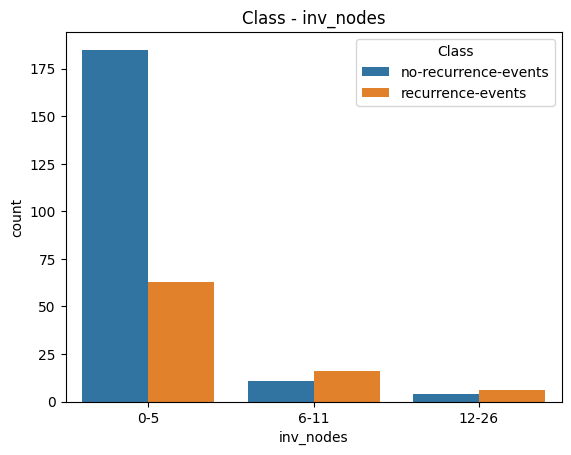

In [ ]:
sns.countplot(x="inv_nodes", hue= "Class", data = df)
plt.title("Class - inv_nodes")
plt.show()

The patients with fewer nodes involved tend to have higher count of no-recurrence events,while those with more number of involved nodes shows an increase in recurrence events.

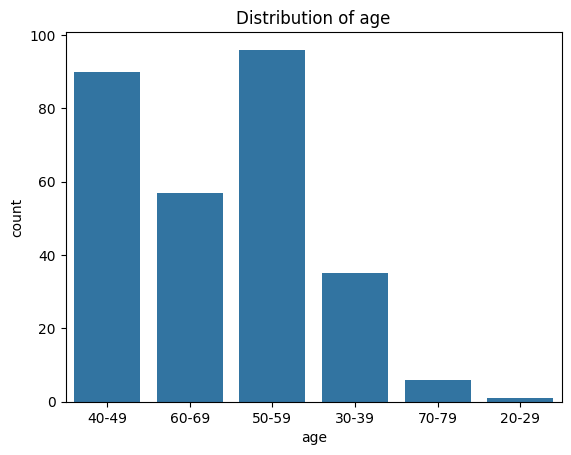

Proportions of Age Value
age
50-59    0.336842
40-49    0.315789
60-69    0.200000
30-39    0.122807
70-79    0.021053
20-29    0.003509
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x = "age", data = df)
plt.title("Distribution of age")
plt.show()

print("Proportions of Age Value")
print(df.age.value_counts(normalize = True))

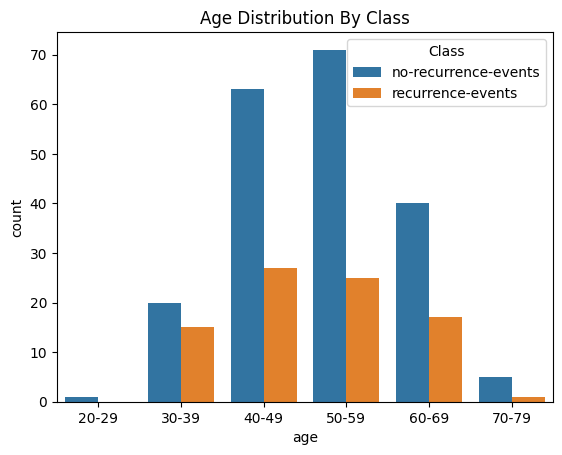

In [ ]:
sns.countplot(x="age", hue= "Class", data = df,order = ["20-29","30-39","40-49","50-59","60-69","70-79"])
plt.title("Age Distribution By Class")
plt.show()


This plot shows that no-recurrence events are more frequent across all age groups while recurrence events are relatively fewer.But a slightly higher proportion of recurrence events are observed among the age group between 40 and 60.

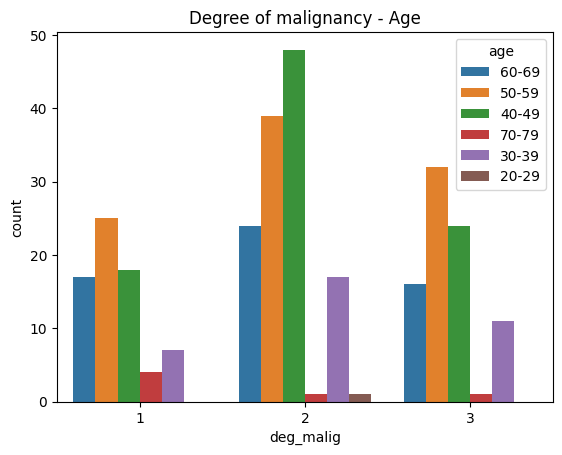

In [ ]:
sns.countplot(x="deg_malig", hue= "age", data = df,)
plt.title("Degree of malignancy - Age")
plt.show()


The bar plot comparing degree of malignancy with age shows that malignancy grades 2 and 3 occur across a wide range of ages, while lower malignancy appears less frequent overall.
Among age groups, middle-aged and older patients tend to show a slightly higher count of higher-degree malignancies, indicating that cancer severity may increase with age.


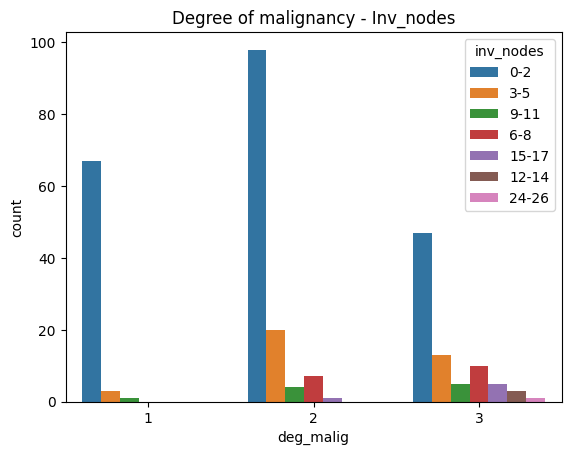

In [ ]:
sns.countplot(x="deg_malig", hue= "inv_nodes", data = df,)
plt.title("Degree of malignancy - Inv_nodes")
plt.show()


Higher malignancy corresponds to fewer number of nodes



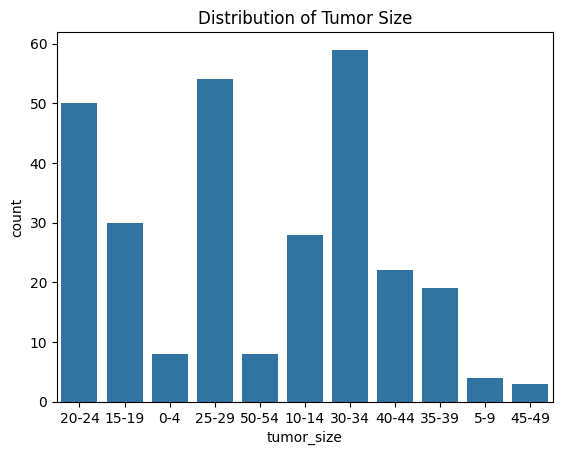

tumor_size
30-34    59
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64


In [ ]:
sns.countplot(x = "tumor_size", data = df)
plt.title("Distribution of Tumor Size")
plt.show()
print(df.tumor_size.value_counts())



In [ ]:
df['tumor_size'] = df['tumor_size'].replace({"0-4": "0-9", "5-9": "0-9"})
df['tumor_size'] = df['tumor_size'].replace({"40-44": "40-49", "45-49": "40-49"})
df['tumor_size'] = df['tumor_size'].replace({"10-14": "10-19", "15-19": "10-19"})
df['tumor_size'] = df['tumor_size'].replace({"20-24": "20-29", "25-29": "20-29"})
df['tumor_size'] = df['tumor_size'].replace({"50-54": "40-54", "40-49": "40-54"})
df['tumor_size'] = df['tumor_size'].replace({"30-34": "30-39", "35-39": "30-39"})

print(df.tumor_size.value_counts())

tumor_size
20-29    104
30-39     78
10-19     58
40-54     33
0-9       12
Name: count, dtype: int64


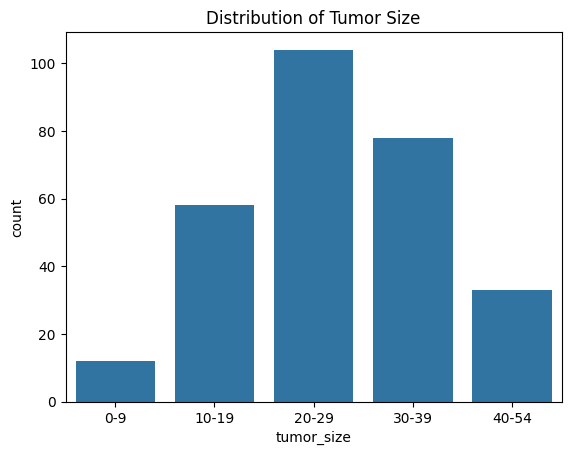

In [ ]:
sns.countplot(x="tumor_size", data=df, order=["0-9", "10-19", "20-29", "30-39", "40-54"])
plt.title("Distribution of Tumor Size")
plt.show()

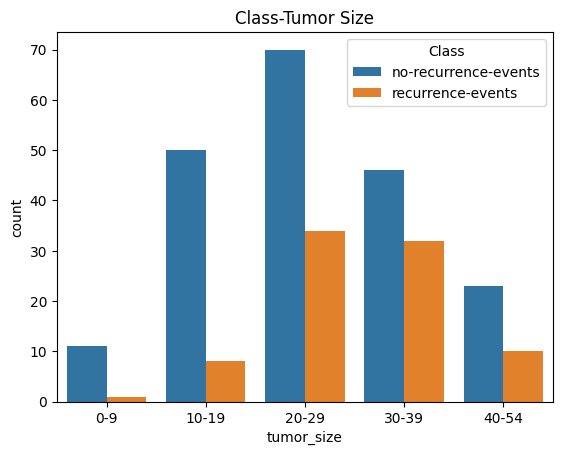

In [ ]:
sns.countplot(x="tumor_size", hue= "Class", data = df,order=["0-9", "10-19", "20-29", "30-39", "40-54"])
plt.title("Class-Tumor Size")
plt.show()

This plot shows that no-recurrence events are frequent for all tumor size.But the tumor size between 20-39 has relatively more recurrence events.

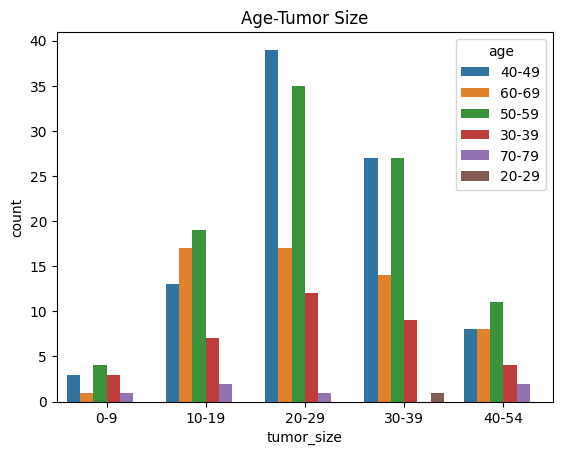

In [ ]:
sns.countplot(x="tumor_size", hue= "age", data = df,order=["0-9", "10-19", "20-29", "30-39", "40-54"])
plt.title("Age-Tumor Size")
plt.show()

Middle-aged and Older patients have higher range of tumor size.

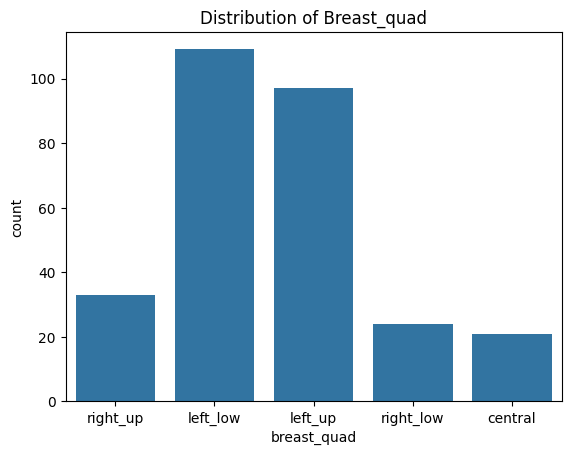

breast_quad
left_low     109
left_up       97
right_up      33
right_low     24
central       21
Name: count, dtype: int64


In [ ]:
sns.countplot(x = "breast_quad", data = df)
plt.title("Distribution of Breast_quad")
plt.show()
print(df.breast_quad.value_counts())



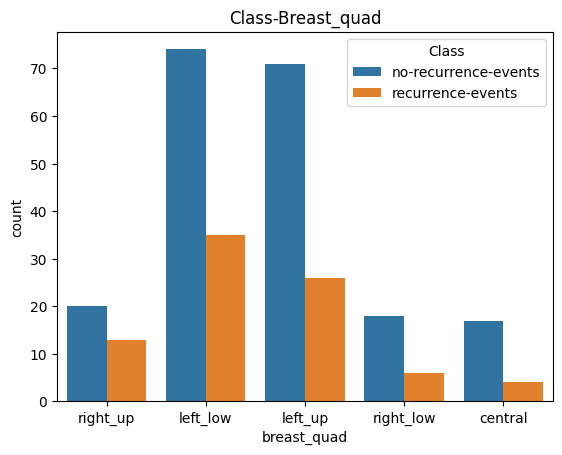

In [ ]:
sns.countplot(x="breast_quad", hue= "Class", data = df)
plt.title("Class-Breast_quad")
plt.show()

No-recurrence events are frequent among all positions.Left_low and Left_up has relatively higher recurrence events compared to others

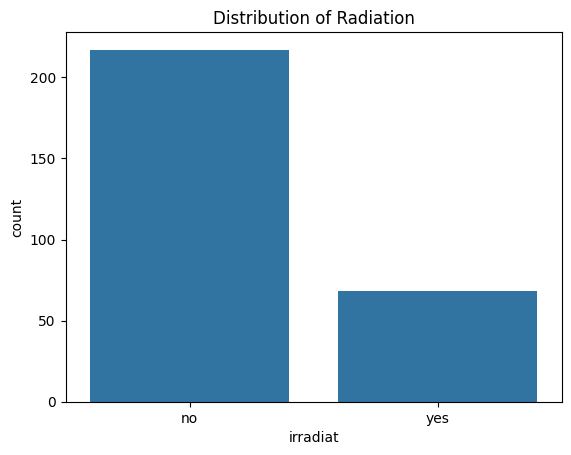

irradiat
no     217
yes     68
Name: count, dtype: int64


In [ ]:
sns.countplot(x = "irradiat", data = df)
plt.title("Distribution of Radiation")
plt.show()
print(df.irradiat.value_counts())


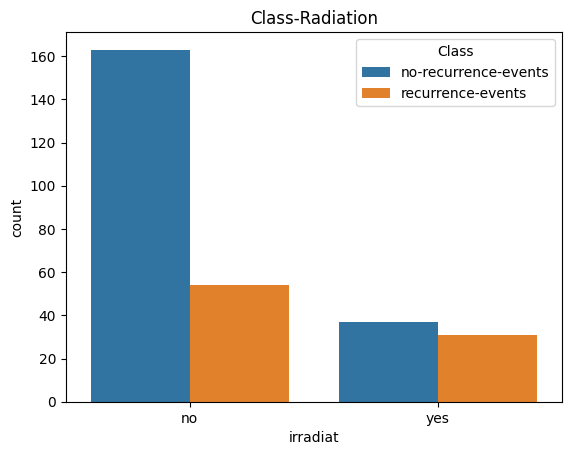

In [ ]:
sns.countplot(x="irradiat", hue= "Class", data = df)
plt.title("Class-Radiation")
plt.show()

Higher no-recurrence events for the patients did not receive radiation therapy compared to recurrence events.For the patients who recieve the radiation the no-recurrence events and recurrence events are realatively closer.

In the original dataset, the feature class is represented as strings. To make these features suitable for our model, we converted them into numeric binary variables that capture their underlying meaning.That is the class ,recurrence events and no-recurrence events are converted to 1 and 0 respectively.



In [ ]:
df['Class_encoded'] = df['Class'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})
print(df['Class_encoded'].value_counts())

Class_encoded
0    200
1     85
Name: count, dtype: int64


/tmp/ipython-input-19832703.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class_encoded'] = df['Class'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})


/tmp/ipython-input-561030846.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 0),'deg_malig'] , color='b',shade=True,label='no-recurrence-events')
/tmp/ipython-input-561030846.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 1),'deg_malig'] , color='r',shade=True, label='recurrence-events')


Text(0.5, 1.0, 'Class VS Degree of Malignancy')

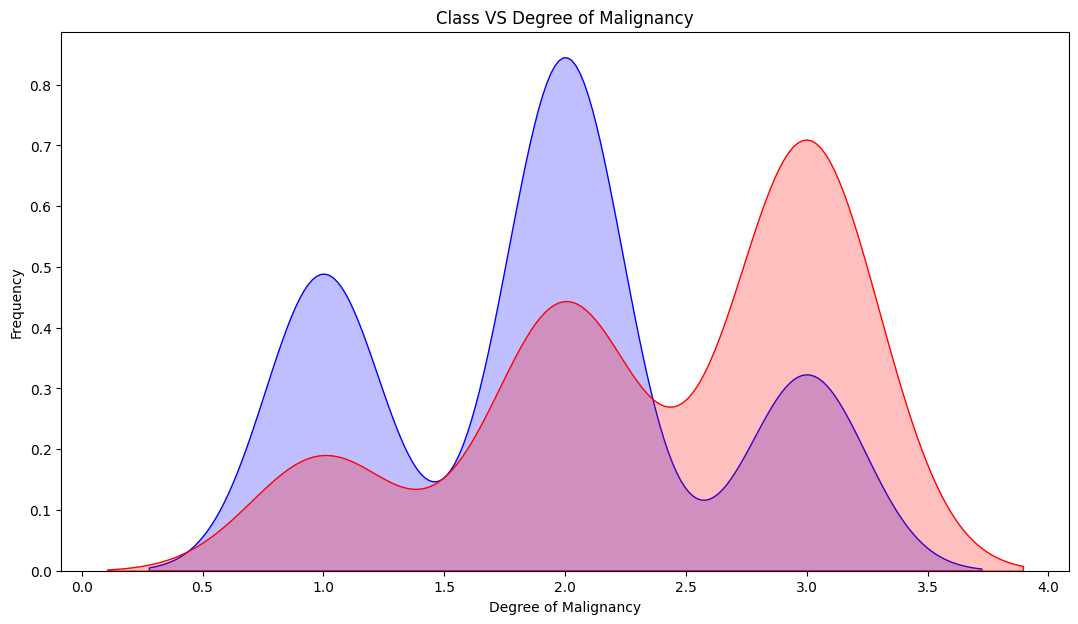

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 0),'deg_malig'] , color='b',shade=True,label='no-recurrence-events')
ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 1),'deg_malig'] , color='r',shade=True, label='recurrence-events')
ax.set(xlabel='Degree of Malignancy', ylabel='Frequency')
plt.title('Class VS Degree of Malignancy')

Recurrence events increases as degree of malignancy increases.

OBSERVATIONS

*  Class Distribution (Recurrence vs No Recurrence):

The dataset is imbalanced, with significantly more cases in one class than the other.
*   Class vs Menopause

Some trends are visible in recurrence rates across menopause status, but no extremely strong correlation.
Premenopausal patients seem to have slightly different recurrence patterns than postmenopausal patients.

*  Class vs Degree of Malignancy

Higher degrees of malignancy correlate with higher recurrence rates.
Lower malignancy degrees mostly correspond to non-recurrence.

*  Class vs Number of Involved Nodes

Patients with more involved lymph nodes show higher recurrence rates.

*   Class vs Age:

Age distribution shows slightly higher recurrence in older age groups, but trends are subtle.

*   Degree of Malignancy vs Age:

No extremely strong pattern, but higher malignancy seems slightly more frequent in older patients.The majority of patients are in the mid-range of age with moderate malignancy levels.


Overall, key predictors of recurrence seem to be degree of malignancy and number of involved nodes, followed by age and menopause status.


